
# UNHCR Forcibly Displaced Populations Casptone Project

## Network Analysis

---

In this notebook, I performed further exploratory analysis of the dataset, specifically applying network analysis using the Python package *NetworkX*. 

The main aim of this was to visualise relationships between the countries of origin and countries of asylum. I was then able to determine which countries were the most important and most influential with regards to the movement of people **across borders** over the time period.

--- 

### Load the data

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import networkx as nx
from networkx.algorithms import bipartite

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [16]:
columns = ['country_of_origin', 'country_of_asylum']

In [17]:
df = pd.read_csv('/Users/dayosangowawa/Desktop/GA/DSI20-lessons/projects/project-capstone/My Capstone/Forcibly displaced persons - Capstone Dayo Sangowawa/cleaned_unhcrdf_final.csv')[columns]

In [18]:
df

country_of_origin country_of_asylum
0              Colombia             Aruba
1                  Cuba             Aruba
2           Afghanistan       Afghanistan
3           Afghanistan       Afghanistan
4           Afghanistan       Afghanistan
...                 ...               ...
80331            Uganda          Zimbabwe
80332            Zambia          Zimbabwe
80333          Zimbabwe          Zimbabwe
80334          Zimbabwe          Zimbabwe
80335          Zimbabwe          Zimbabwe

[80336 rows x 2 columns]

### Creating and Visualising the Network Graph - Directed Acyclic Graph

In [259]:
DG = nx.DiGraph()

In [260]:
DG = nx.from_pandas_edgelist(df, source='country_of_origin', target = 'country_of_asylum', create_using = nx.DiGraph)

In [262]:
print(nx.info(DG))

Name: 
Type: DiGraph
Number of nodes: 212
Number of edges: 6279
Average in degree:  29.6179
Average out degree:  29.6179


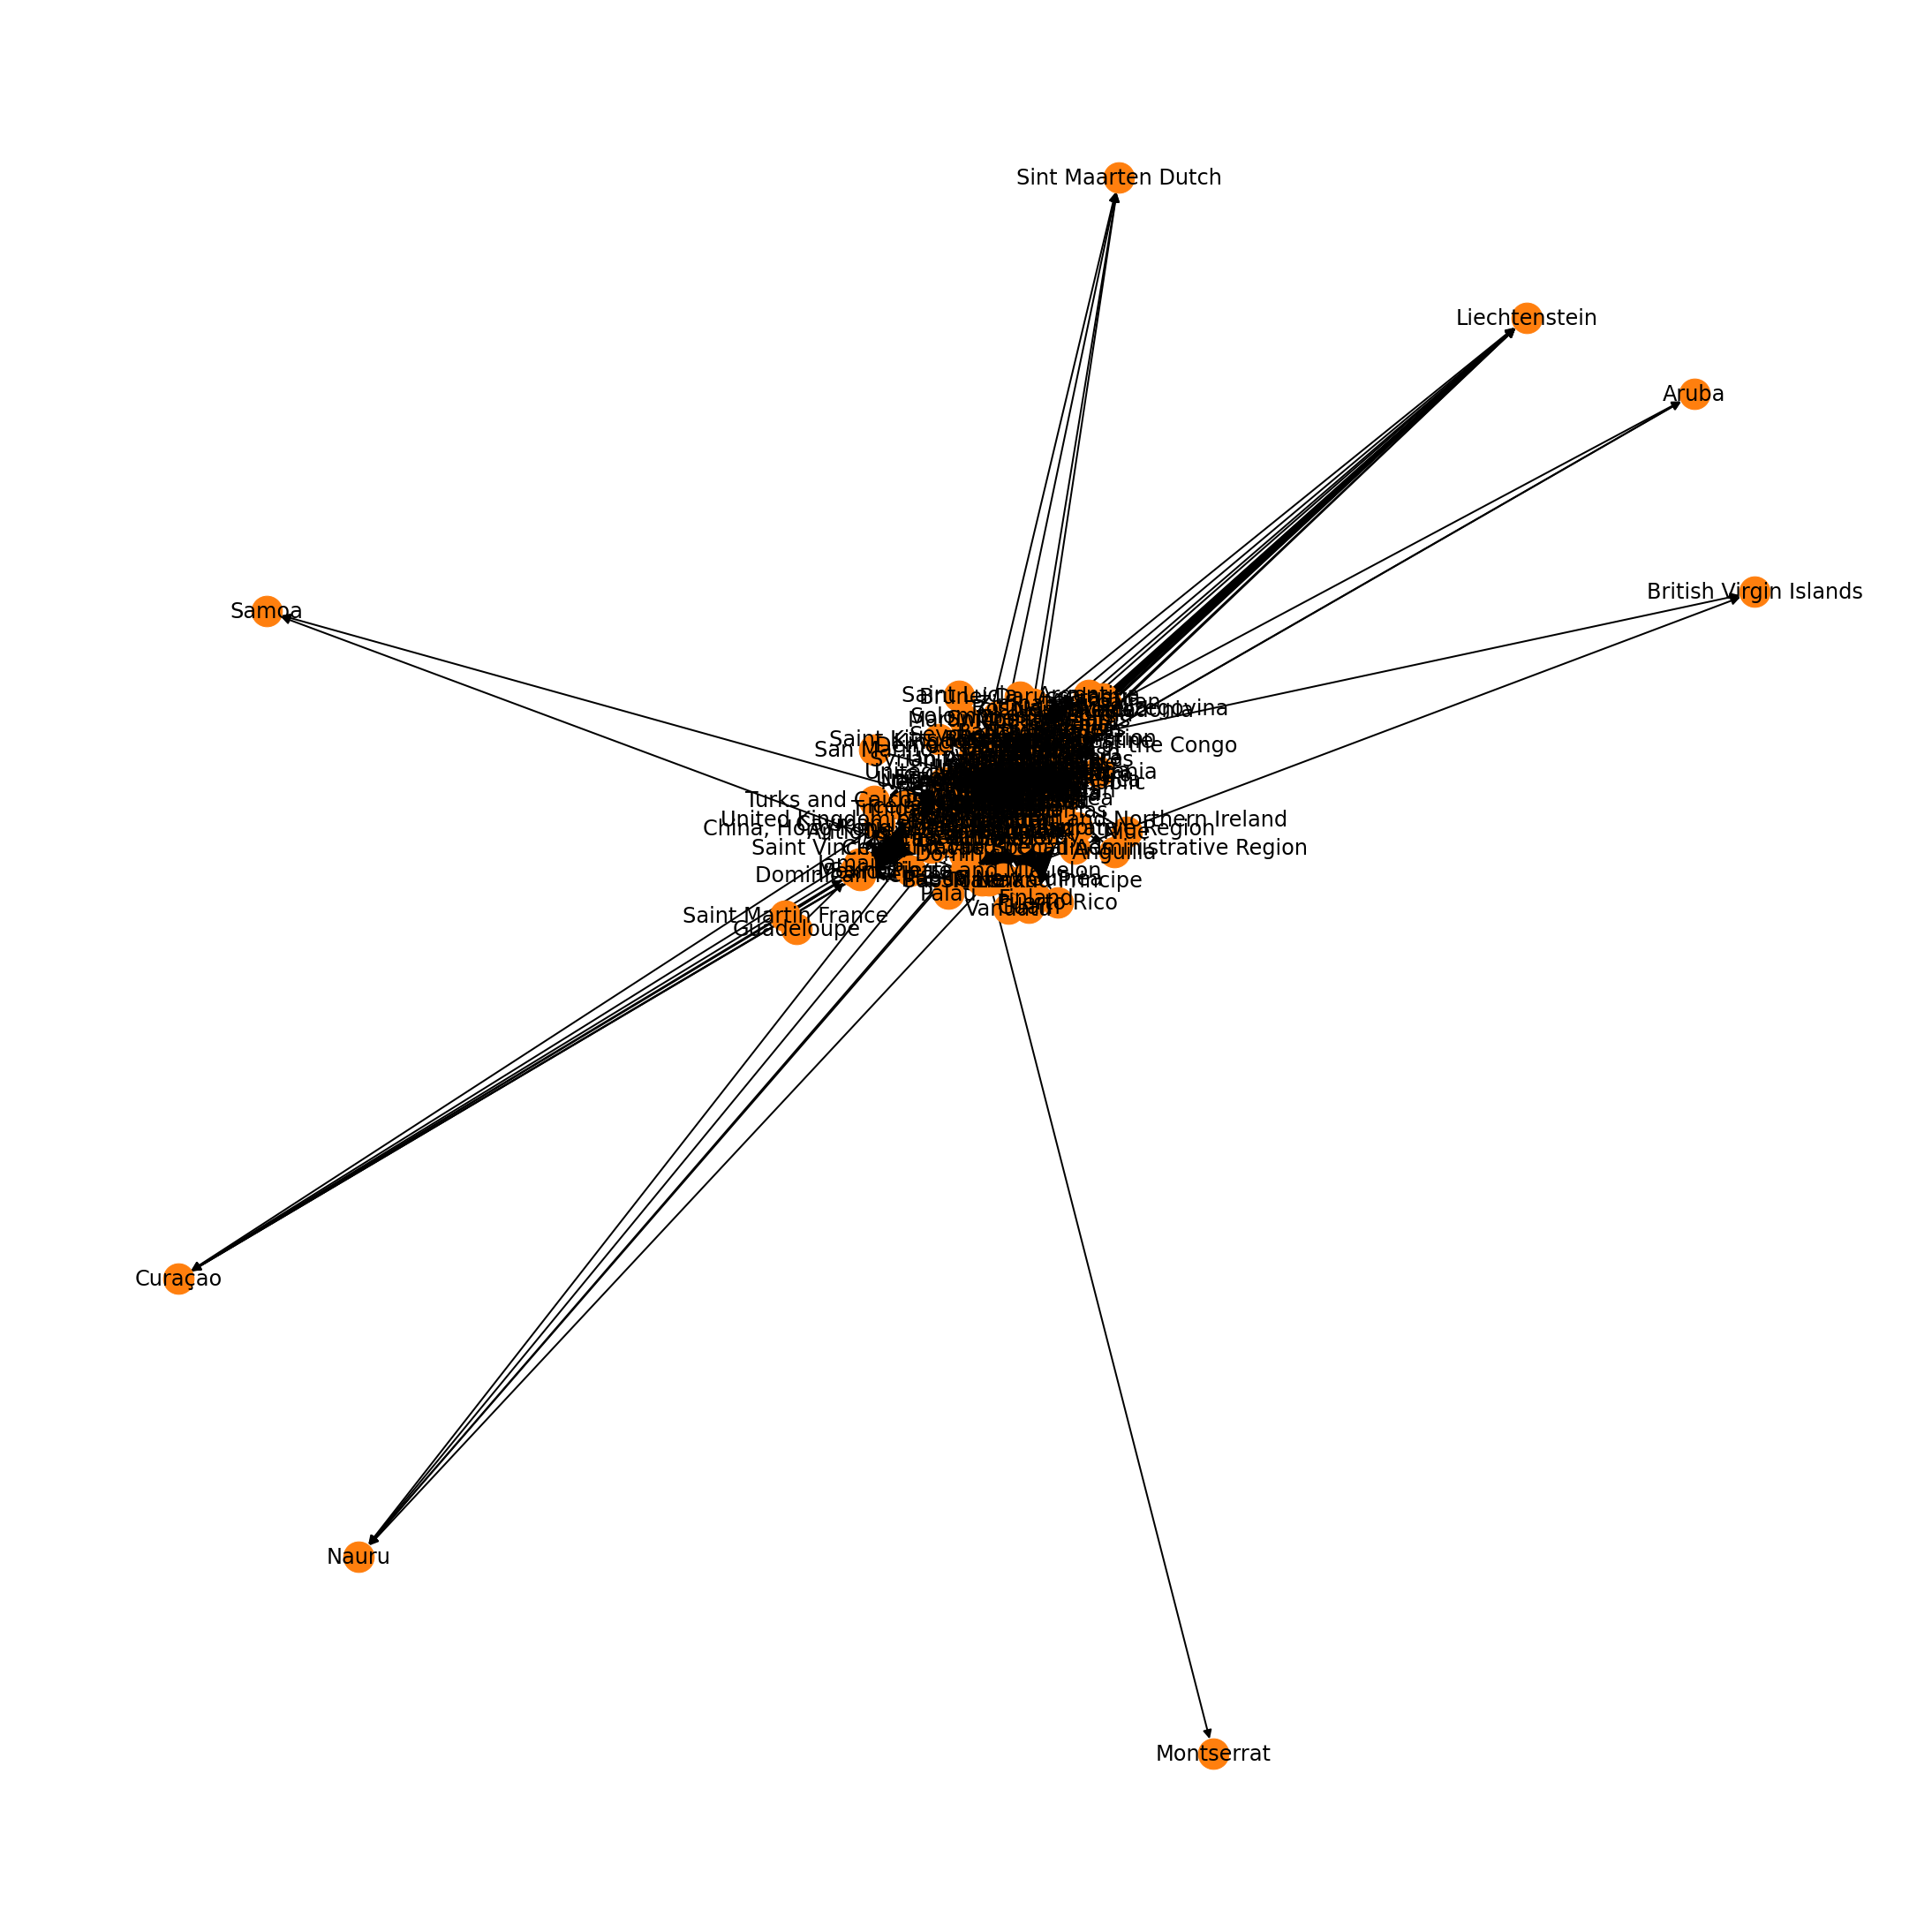

In [298]:
plt.figure(figsize=(15,15))
nx.draw(DG, with_labels=True, node_color='tab:orange')
plt.show();

### Creating and Visualising the Network Graph - Undirected Graph

In [299]:
G = nx.Graph()

In [300]:
G = nx.from_pandas_edgelist(df, source='country_of_origin', target = 'country_of_asylum')

In [304]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 212
Number of edges: 5410
Average degree:  51.0377


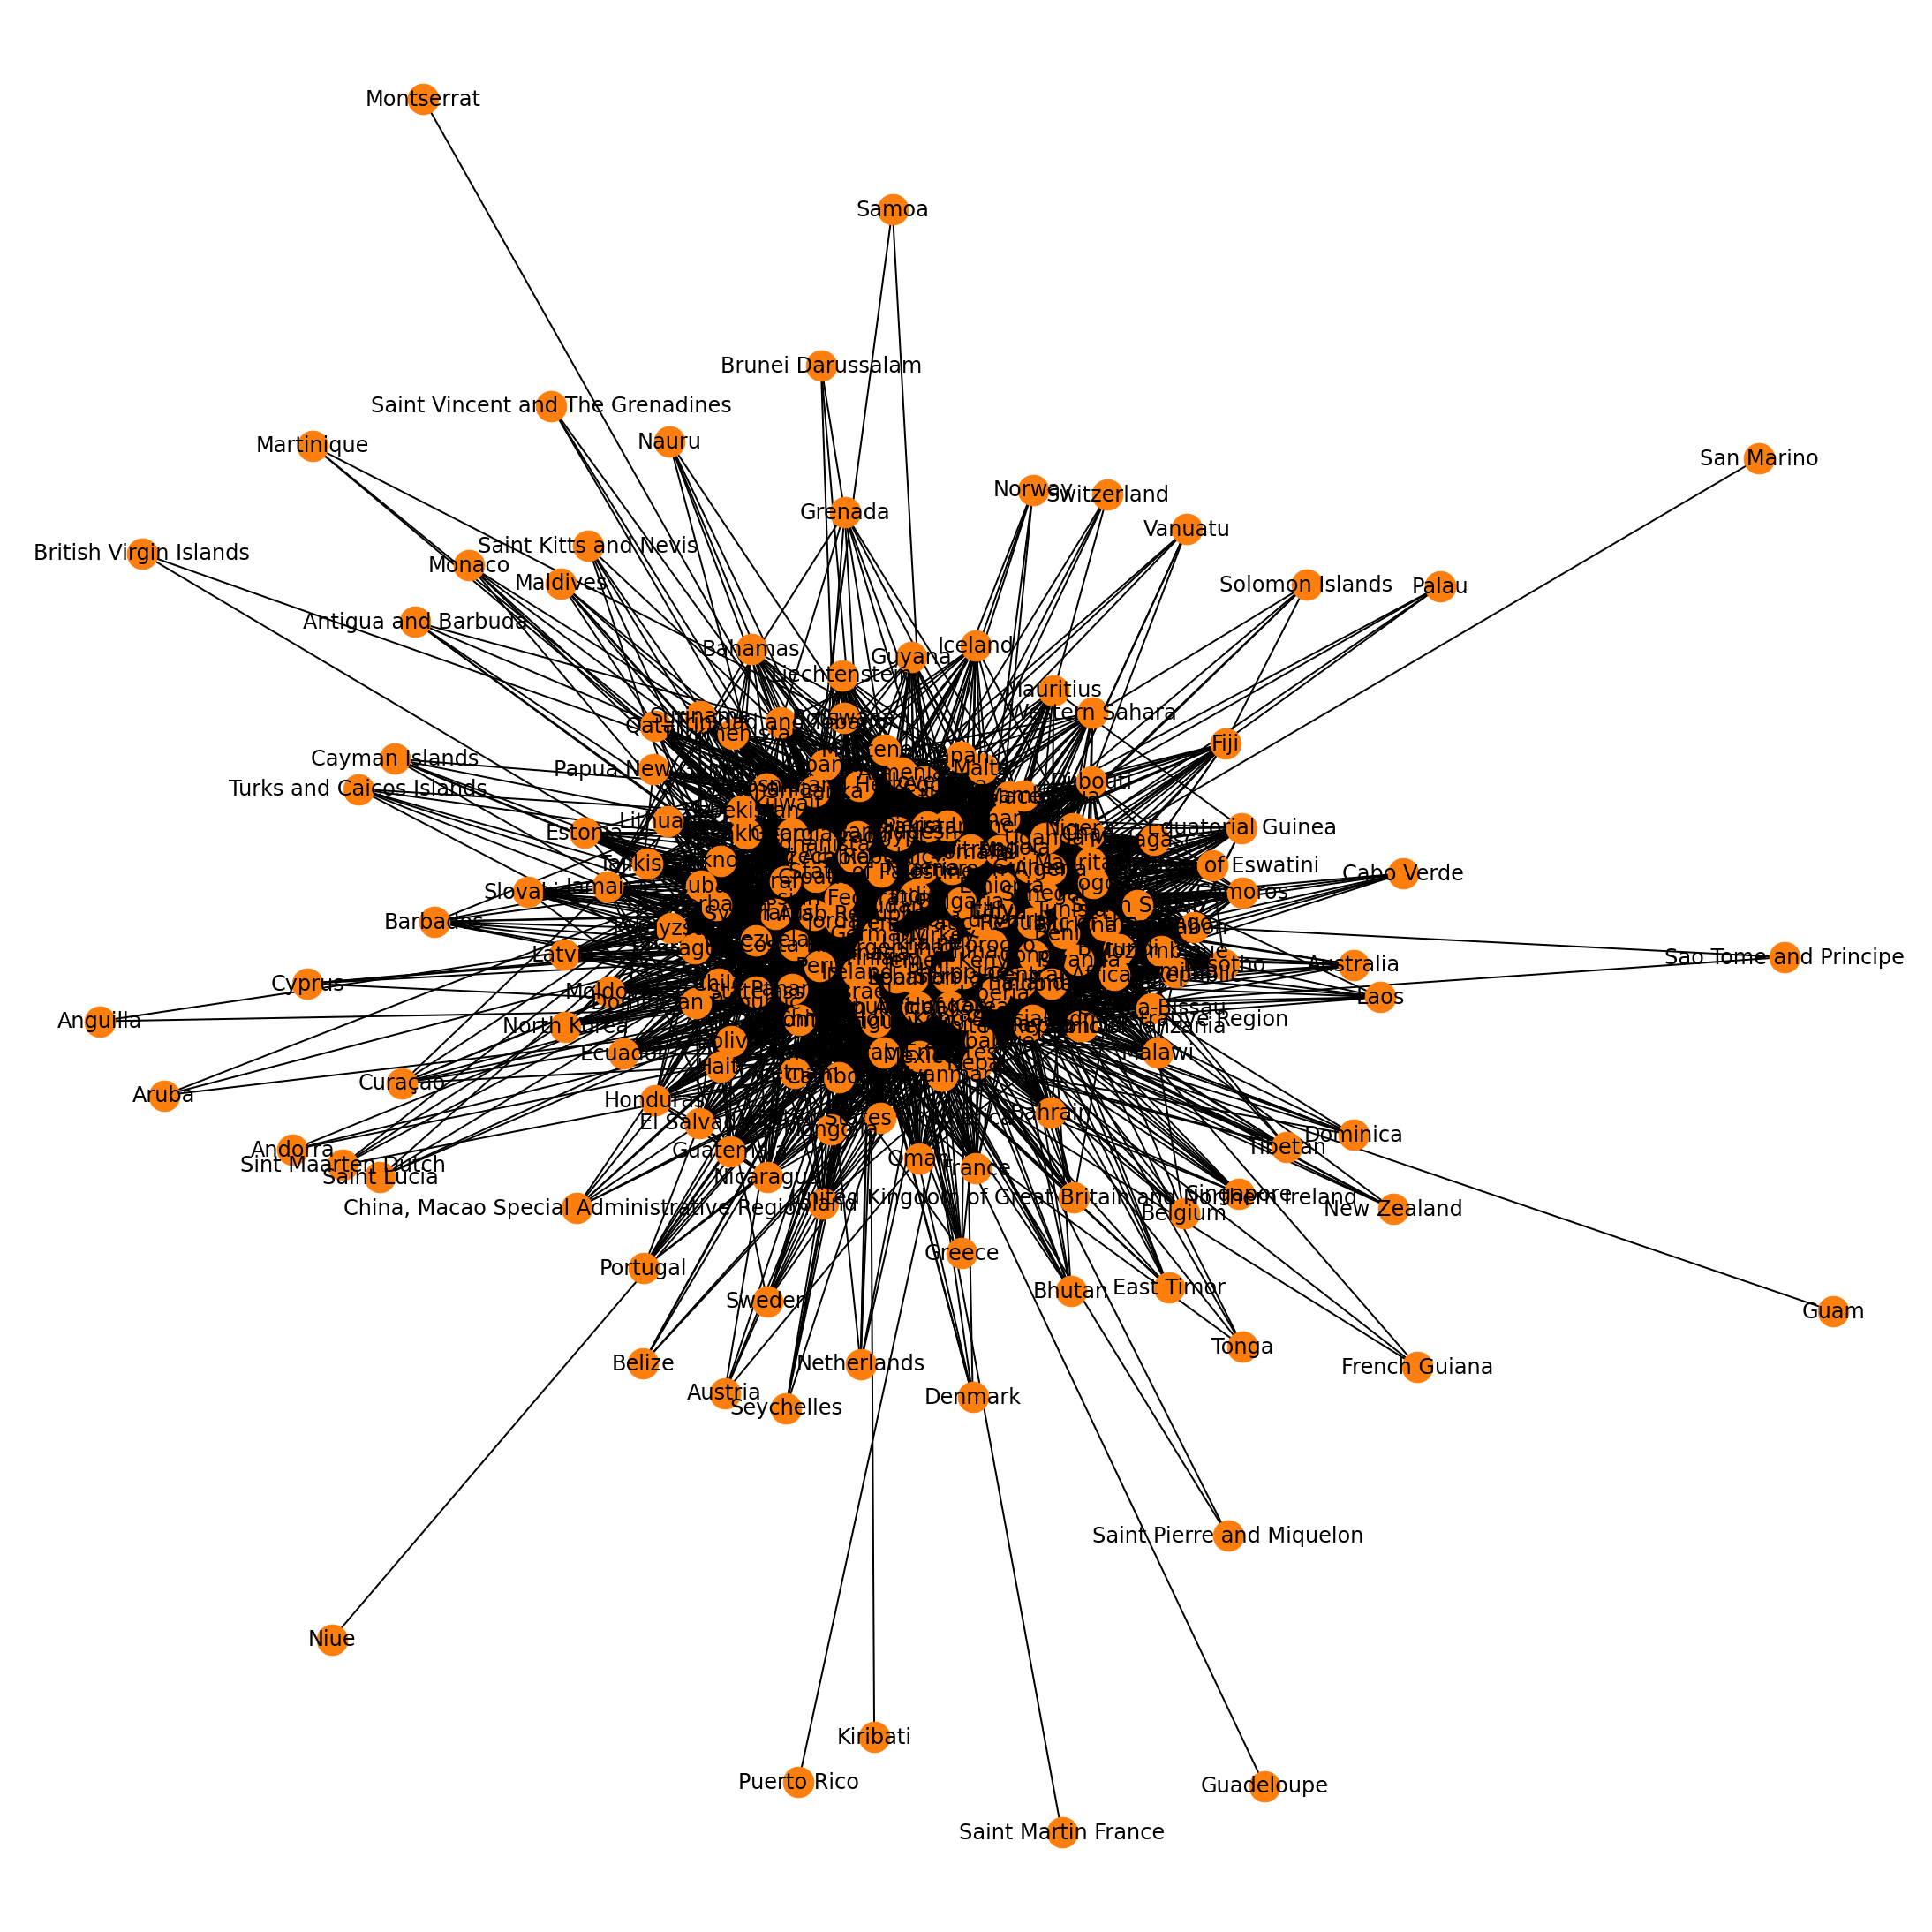

In [305]:
plt.figure(figsize=(15,15))
nx.draw(G, with_labels=True, node_color='tab:orange')
plt.savefig('u_graph_networks.png', dpi=300, bbox_inches = "tight")
plt.show();

### Degree Centrality

The 5 countries with the **greatest number of connections (edges)** were as follows (in descending order of importance):

- Canada 
- Turkey
- Syrian Arab Republic
- Brazil
- Germany

Essentially, this means that these countries had the greatest number of links with other countries. It is not specific to a particular direction; it takes into account **incoming or outcoming traffic** of all countries.

In [60]:
most_influential = nx.degree_centrality(DG)

In [88]:
for country in sorted(most_influential, key=most_influential.get, reverse=True):
    print(country, most_influential[country])

Canada 0.9146919431279622
Turkey 0.8672985781990522
Syrian Arab Republic 0.8625592417061612
Brazil 0.8625592417061612
Germany 0.8578199052132702
Egypt 0.8009478672985783
Ukraine 0.7677725118483413
Italy 0.7251184834123223
Cameroon 0.7109004739336493
Nigeria 0.7109004739336493
Sudan 0.7061611374407584
South Africa 0.6966824644549764
Lebanon 0.6729857819905214
Argentina 0.6682464454976303
Democratic Republic of the Congo 0.6635071090047394
Côte d'Ivoire 0.6540284360189574
India 0.6492890995260664
Mexico 0.6445497630331753
Ethiopia 0.6398104265402844
Spain 0.6398104265402844
Iraq 0.6350710900473934
Somalia 0.6303317535545024
Yemen 0.6303317535545024
Ireland 0.6255924170616114
Russian Federation 0.6208530805687205
Jordan 0.6161137440758294
Pakistan 0.6066350710900474
Morocco 0.6066350710900474
Republic of Korea 0.5829383886255924
Congo 0.5781990521327015
China 0.5734597156398105
Israel 0.5639810426540285
Uganda 0.5497630331753555
Mali 0.5308056872037915
Liberia 0.5260663507109005
Ghana 0.5

### Eigenvector Centrality

The **5 Most Influential** countries in the movement of people were as follows (in descending order of importance):

- Canada 
- Germany
- Brazil
- Argentina
- Italy

Essentially, this means that these countries had the greatest number of links with other countries AND the greatest influence on movement based on their connections.

In [62]:
most_important = nx.eigenvector_centrality(DG)

In [64]:
for country_important in sorted(most_important, key=most_important.get, reverse=True):
    print(country_important, most_important[country_important])

Canada 0.2391343685377586
Germany 0.23048385462215992
Brazil 0.2243629037686803
Argentina 0.20317426935153185
Italy 0.20185663704609325
Ireland 0.192953206779098
Spain 0.18853141811074134
Mexico 0.18644022952582018
Republic of Korea 0.1689236600918642
Peru 0.1682888649853048
Finland 0.16806781579693308
Israel 0.16279575169724
South Africa 0.1534636033497379
Costa Rica 0.15331551599144422
Uruguay 0.13544018432311014
Turkey 0.13256380346582822
Bulgaria 0.12096837943486413
Ukraine 0.12071270318874965
Czech Republic 0.11928745397555765
Jordan 0.11642932086810256
Colombia 0.11615130538556154
Lebanon 0.11539364843558149
China, Hong Kong Special Administrative Region 0.11313777175719728
Morocco 0.10995883556414555
Croatia 0.10718243750992328
Egypt 0.10683651295774631
China 0.10564932179358773
India 0.10362754266882938
Panama 0.1024817805808197
Indonesia 0.10234761933497191
Philippines 0.1012767402507979
Malaysia 0.09529933168581967
Malta 0.09492211241295072
Russian Federation 0.09231333358293

### Greatest Incoming Traffic

The **5 countries with the greatest amount of incoming traffic (links)** were as follows (in descending order):

- Canada 
- Germany
- Brazil
- Italy
- Ireland

Essentially, this means that these countries had the **greatest influx** of people coming into their country from other countries.

In [195]:
sorted(list(DG.in_degree()), key=lambda x: x[1], reverse=True)[:20]

[('Canada', 175),
 ('Germany', 165),
 ('Brazil', 156),
 ('Italy', 138),
 ('Ireland', 128),
 ('Argentina', 124),
 ('Spain', 121),
 ('Mexico', 114),
 ('Republic of Korea', 111),
 ('South Africa', 110),
 ('Finland', 108),
 ('Israel', 98),
 ('Turkey', 95),
 ('Ukraine', 94),
 ('Peru', 89),
 ('Bulgaria', 82),
 ('Costa Rica', 82),
 ('Egypt', 81),
 ('Uruguay', 78),
 ('Czech Republic', 78)]

### Greatest Outcoming Traffic

The **5 countries with the greatest amount of outcoming traffic (links)** were as follows (in descending order):

- Syrian Arab Republic
- Somalia
- Nigeria
- Sudan
- Democratic Republic of the Congo

Essentially, this means that these countries had the **greatest number** of people **leaving** their country to enter another country.

In [202]:
sorted(list(DG.out_degree()), key=lambda x: x[1], reverse=True)[:20]

[('Syrian Arab Republic', 124),
 ('Somalia', 108),
 ('Nigeria', 104),
 ('Sudan', 104),
 ('Democratic Republic of the Congo', 103),
 ('Iraq', 99),
 ('Cameroon', 99),
 ('Ethiopia', 99),
 ('Eritrea', 98),
 ('Afghanistan', 95),
 ('Pakistan', 95),
 ('Iran', 92),
 ('State of Palestine', 89),
 ('Congo', 89),
 ('Egypt', 88),
 ('Turkey', 88),
 ("Côte d'Ivoire", 87),
 ('Yemen', 85),
 ('Guinea', 80),
 ('Sierra Leone', 80)]

### Further investigations into the connections of Canada and Syrian Arab Republic

An undirected graph was created of the data to take into account links in both directions for all countries. A breadth-first-search tree was then created, starting at Canada and at the Syrian Arab Republic.

The visualisations show all of the connections to and from Canada and Syrian Arab Republic respectively, highlighting key associations between countries.

The sizes of the orange nodes reflect the node degrees (both incoming and outcoming), in relation to the starting node (Canada and Syrian Arab Republic) of the graph.

In [290]:
group_canada = nx.bfs_tree(G, 'Canada')

In [291]:
d = dict(group_canada.degree())

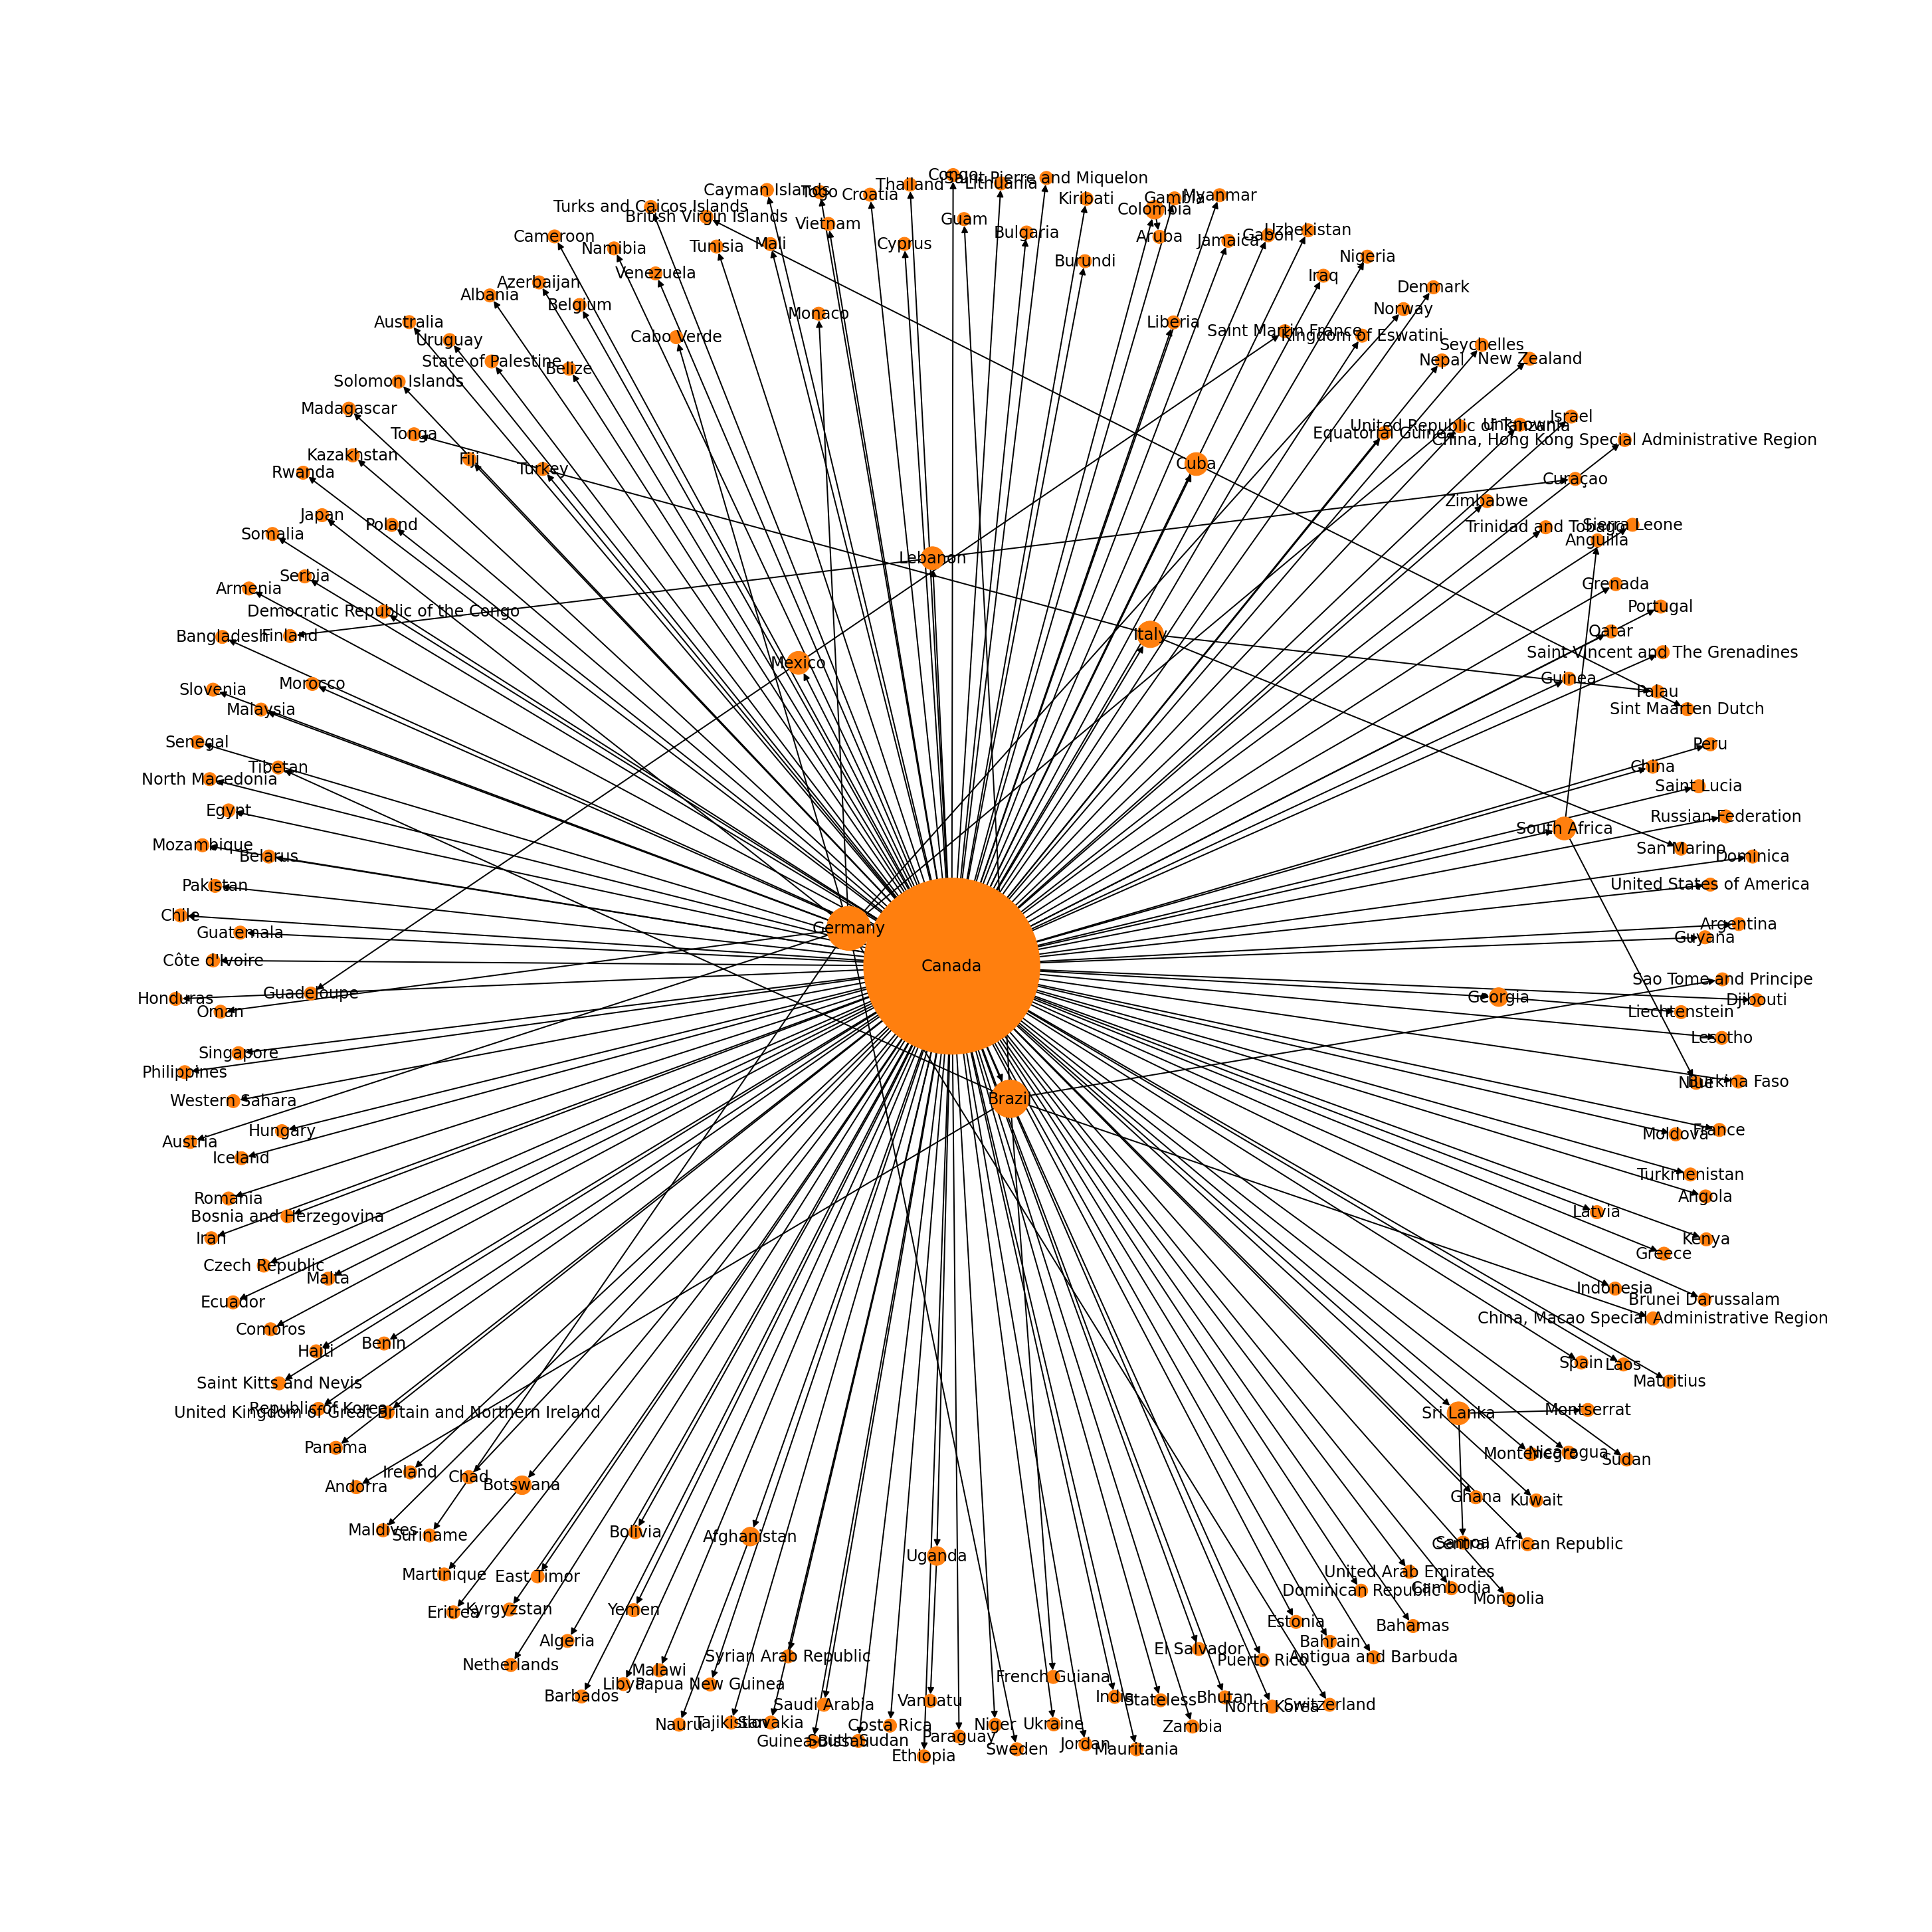

In [297]:
plt.figure(figsize=(20,20))
nx.draw(group_canada, with_labels=True, node_color='tab:orange', node_size = [v * 100 for v in d.values()])
plt.savefig('canada_networks.png', dpi=300, bbox_inches = "tight")
plt.show();

In [277]:
group_syria = nx.bfs_tree(G, 'Syrian Arab Republic')

In [279]:
d2 = dict(group_syria.degree())

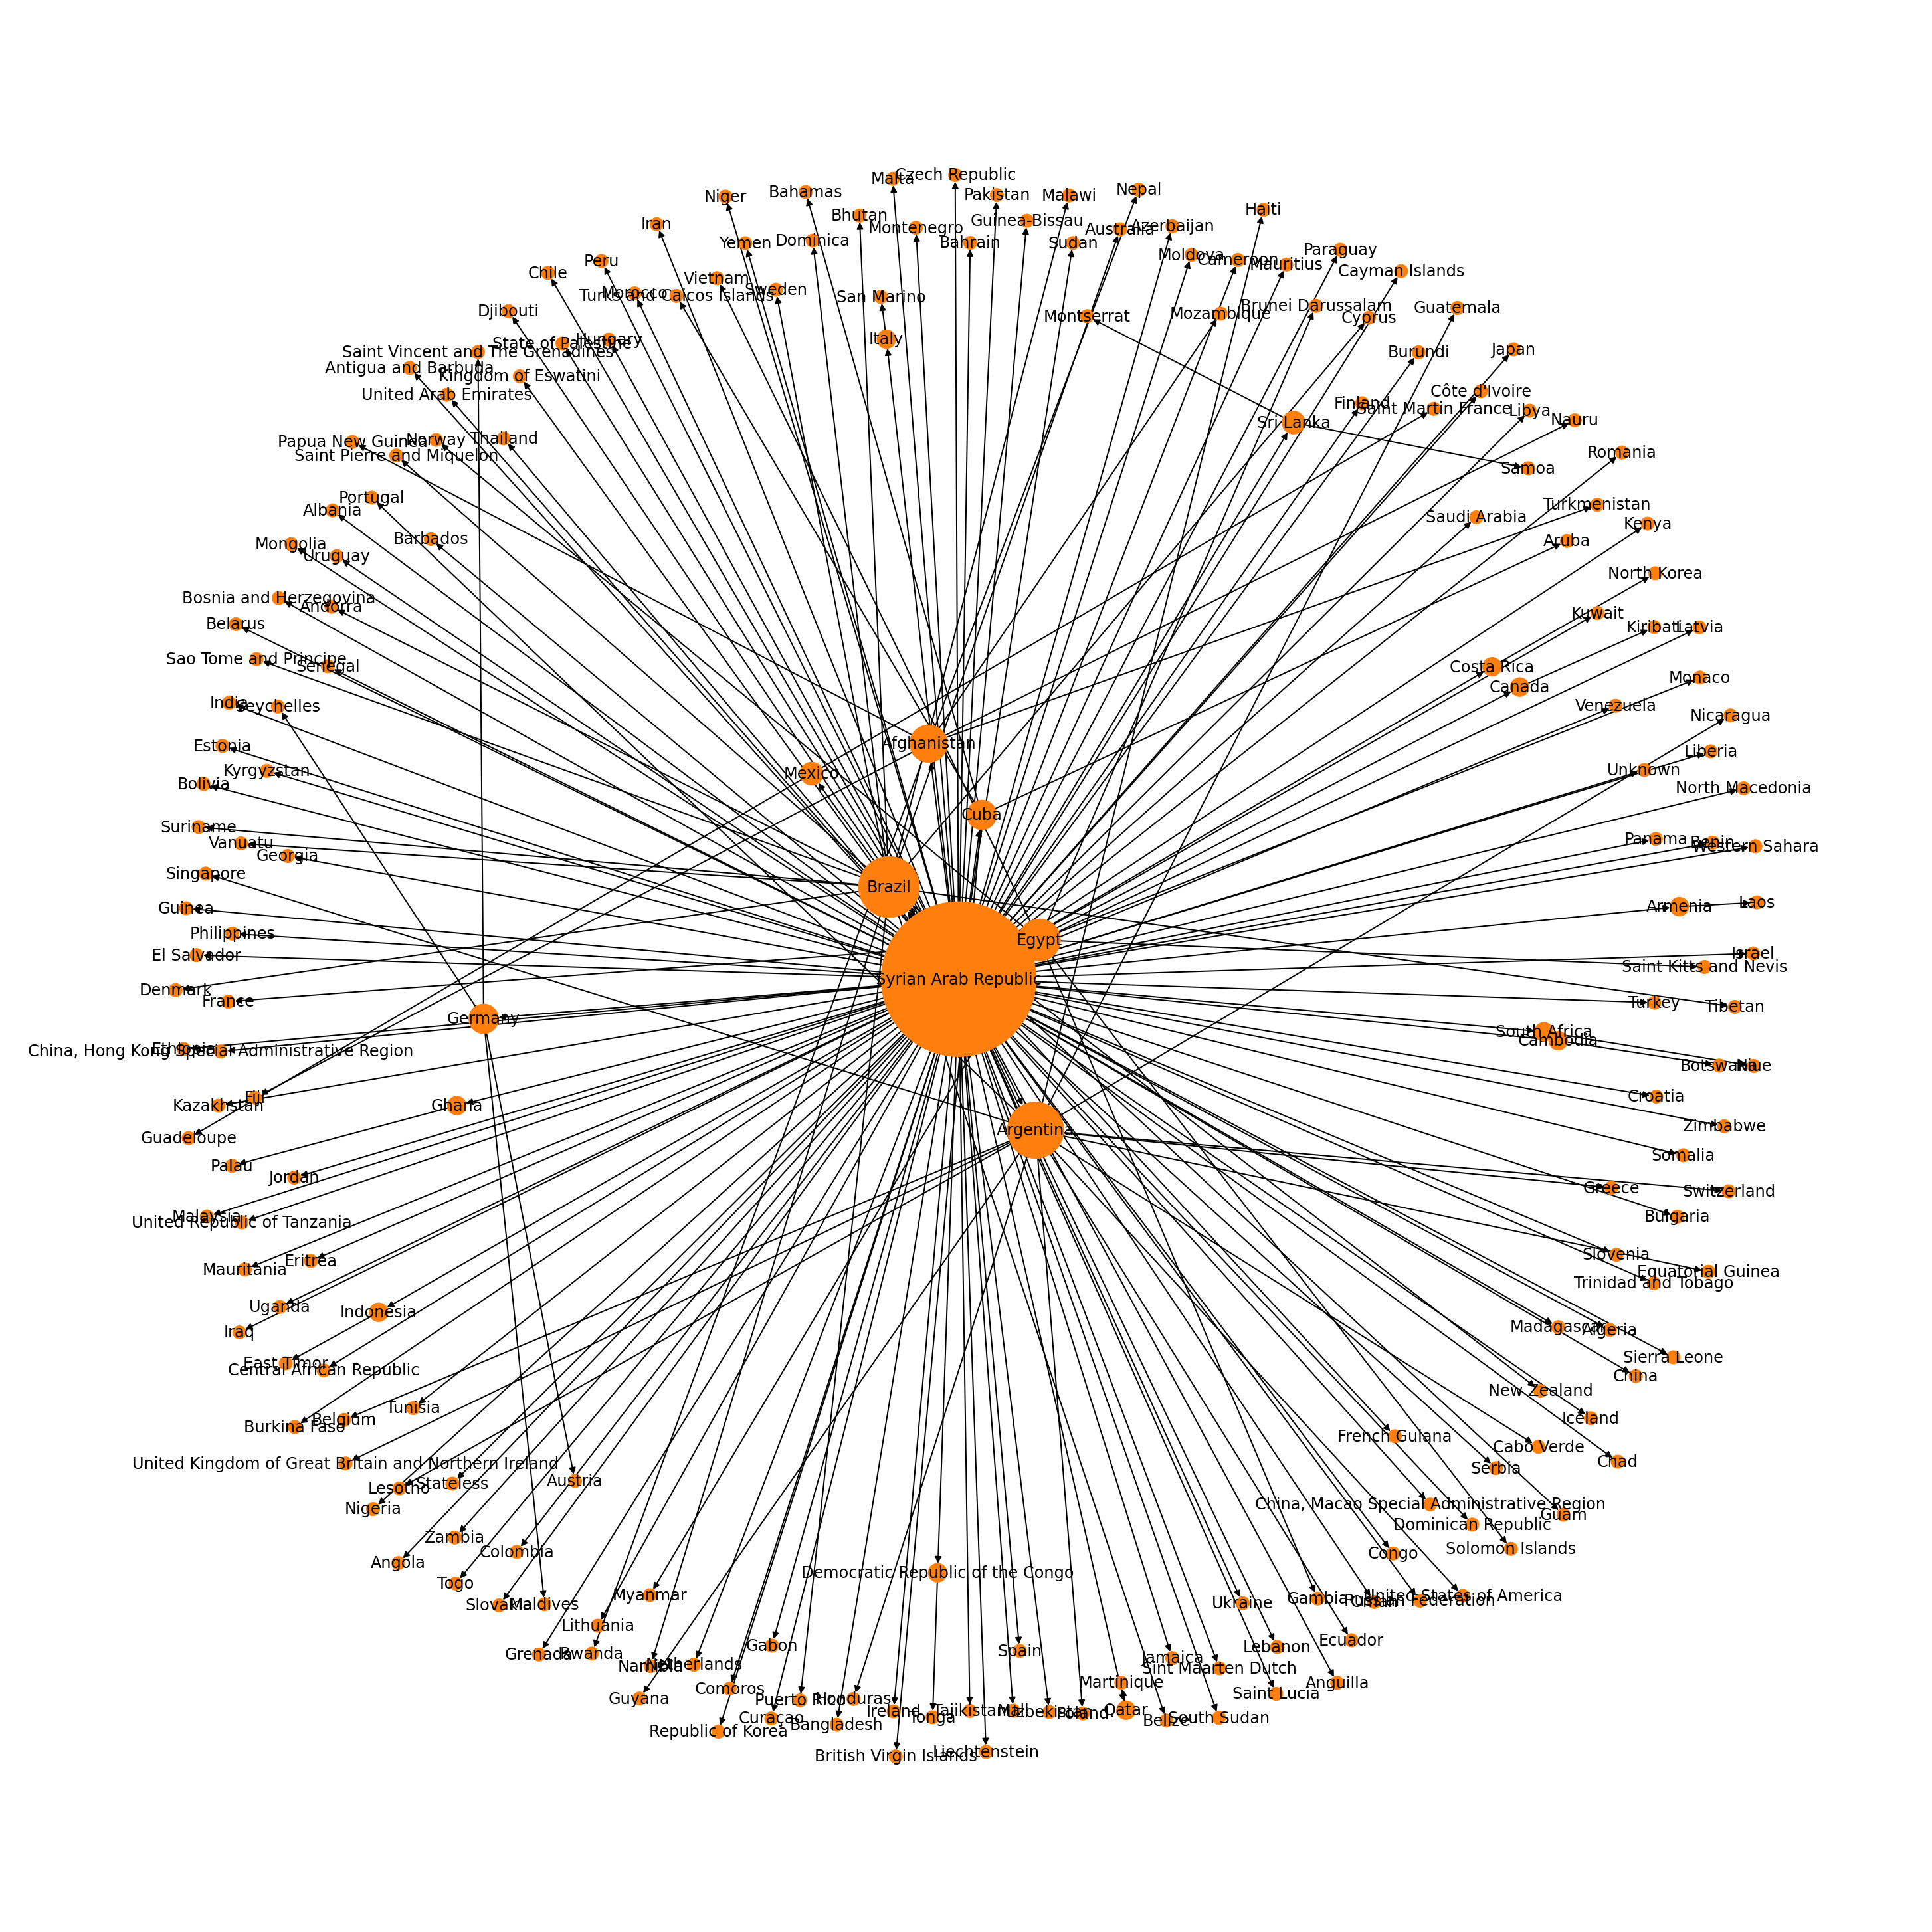

In [296]:
plt.figure(figsize=(20,20))
nx.draw(group_syria, with_labels=True, node_color='tab:orange', node_size = [v * 100 for v in d2.values()])
plt.savefig('syria_networks.png', dpi=300, bbox_inches = "tight")
plt.show();

In [266]:
# group_uk = nx.bfs_tree(G, 'United Kingdom of Great Britain and Northern Ireland')

In [267]:
# d3 = dict(group_uk.degree())

In [295]:
# plt.figure(figsize=(20,20))
# nx.draw(group_uk, with_labels=True, node_color='tab:orange', node_size = [v * 100 for v in d3.values()])
# plt.show();